In [909]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [910]:
train_df = pd.read_csv("./Dataset/train.csv")
test_df = pd.read_csv("./Dataset/test.csv")

In [911]:
train_df.head()
target_column = "Transported"

In [912]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [913]:
print(f"Total Number of rows in training set:  {train_df.count().max()}")
print(f"Total Number of rows in test set:  {test_df.count().max()}")

Total Number of rows in training set:  8693
Total Number of rows in test set:  4277


In [914]:
print(f"Total columns in training: {len(train_df.columns)}")

Total columns in training: 14


In [915]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [916]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [917]:
#  Droping unnecessary columns
train_df.drop("PassengerId",axis=1, inplace=True)
train_df.drop("Name",axis=1, inplace=True)

In [918]:
# checking nans
train_df.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [919]:
# droping null values
train_df.dropna(inplace=True)

In [920]:
# separate integer and object columns
columns = train_df.columns
object_columns = [x for x in train_df.columns if str(train_df[x].dtype) == "object"]
integer_columns =  [elt for elt in columns if elt not in object_columns]
integer_columns.remove(target_column)

In [921]:
print(f"Integer Columns:{integer_columns}")
print(f"Object Columns:{object_columns}")

Integer Columns:['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Object Columns:['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']


In [922]:
train_df.nunique()

HomePlanet         3
CryoSleep          2
Cabin           5413
Destination        3
Age               80
VIP                2
RoomService     1112
FoodCourt       1318
ShoppingMall    1000
Spa             1162
VRDeck          1125
Transported        2
dtype: int64

In [923]:
train_df["deck"] = train_df["Cabin"].apply(lambda x: x.split("/")[0])
train_df["deck_num"] = train_df["Cabin"].apply(lambda x: x.split("/")[1])
train_df["side"] = train_df["Cabin"].apply(lambda x: x.split("/")[2])
train_df['deck_num'] = train_df['deck_num'].astype('float64')
train_df.drop(columns=["Cabin"], inplace=True, axis=1)

In [924]:
train_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
deck_num        0
side            0
dtype: int64

Text(0.5, 1.0, 'Target distribution')

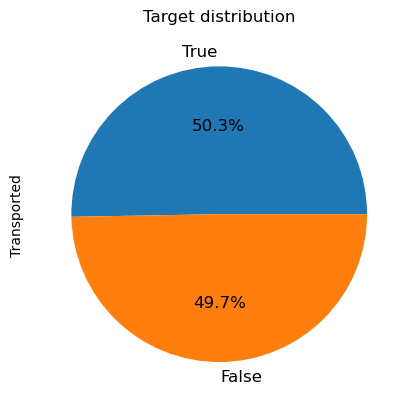

In [925]:
train_df[target_column].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution")

Text(0.5, 0, 'Age (years)')

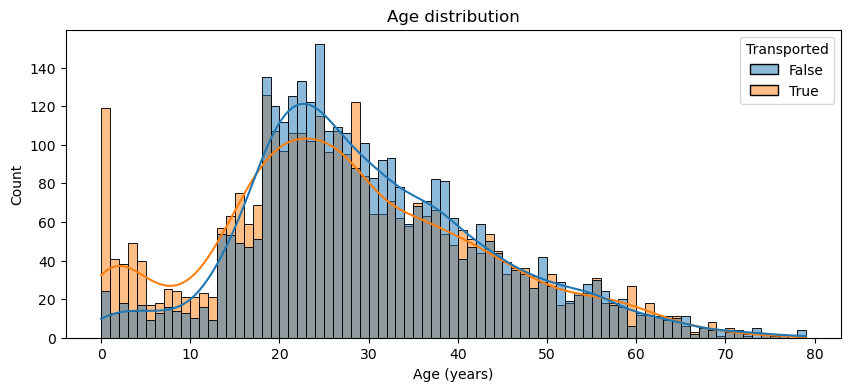

In [926]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')


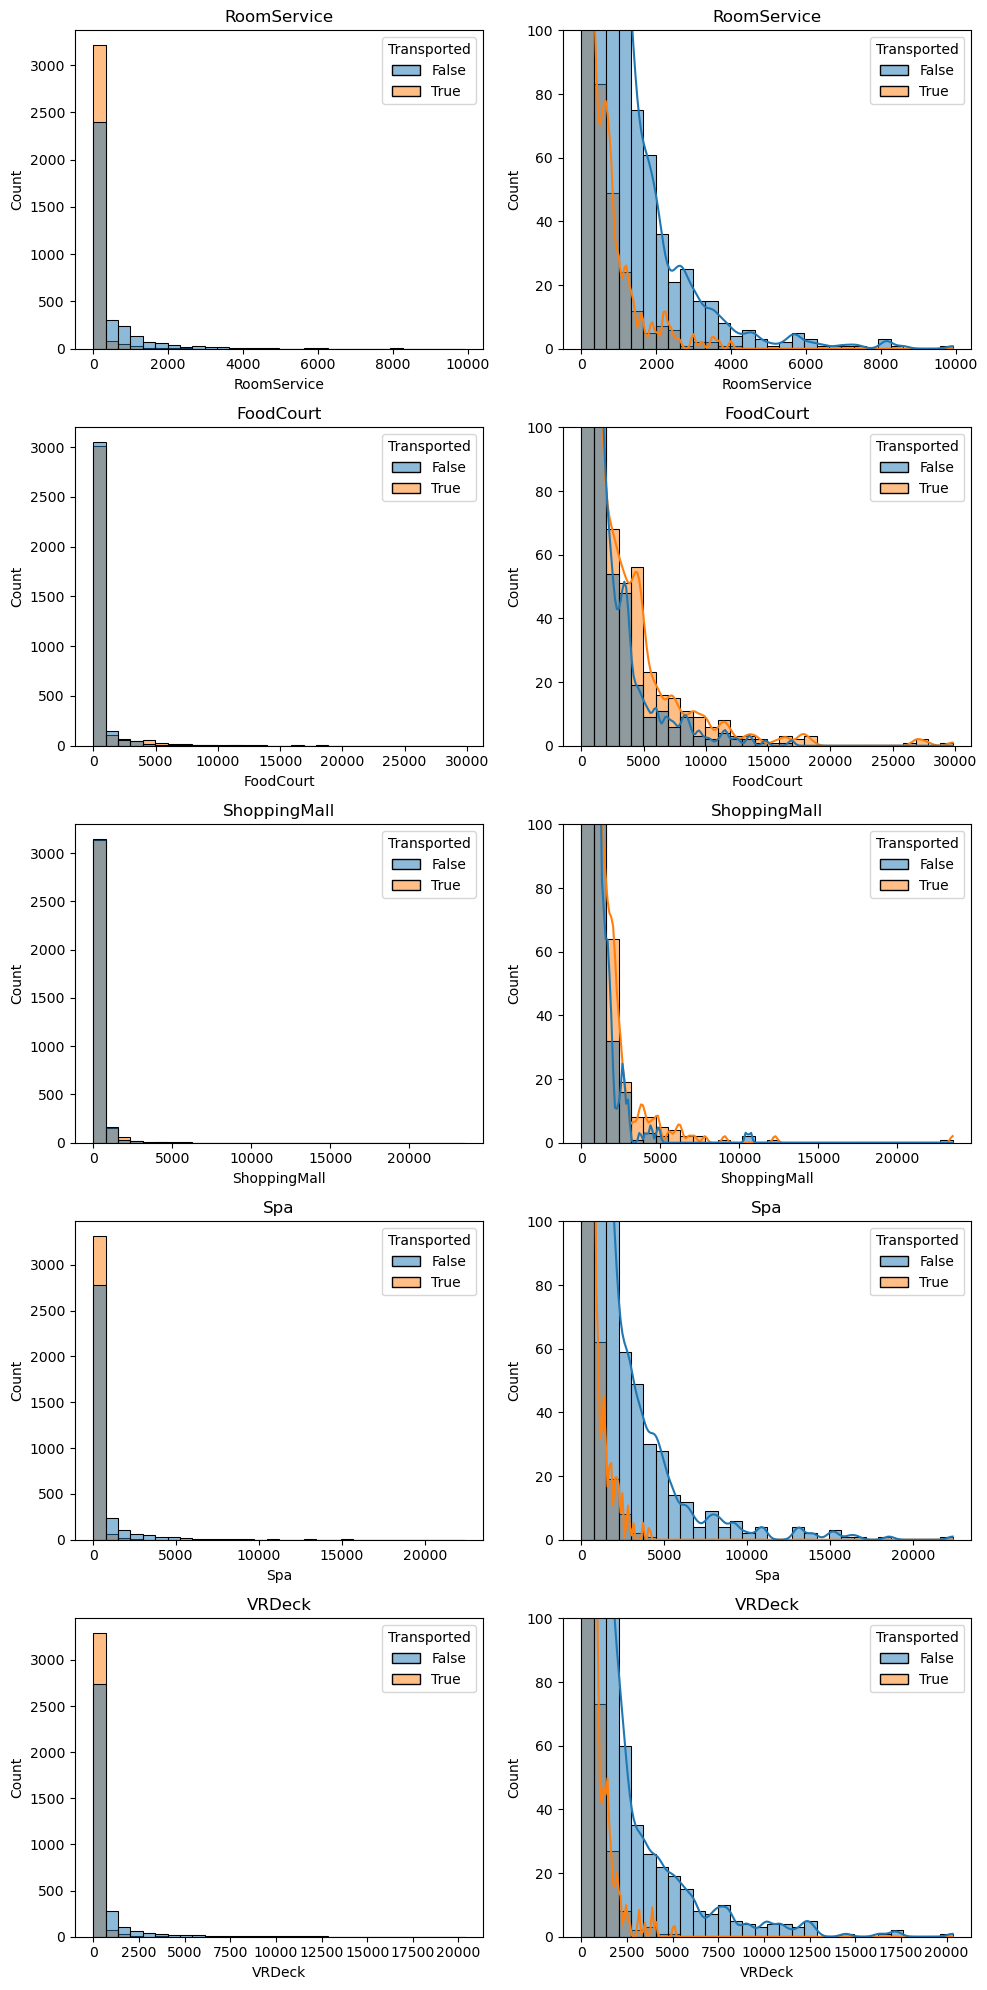

In [927]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()


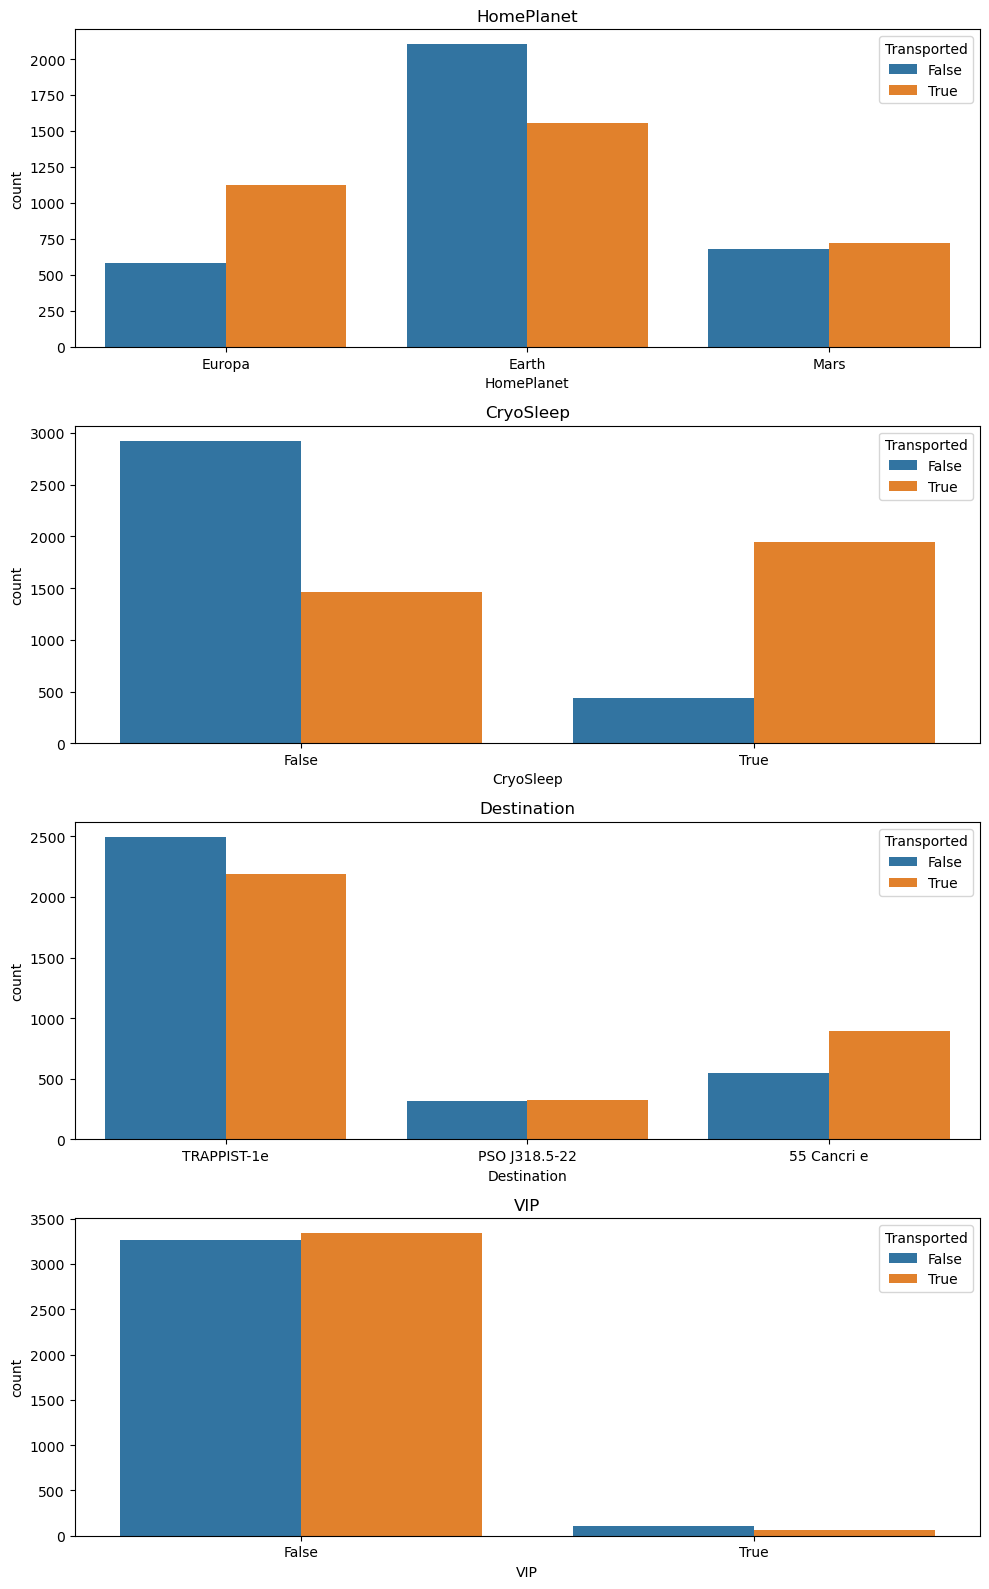

In [928]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

## Feature Engineering

In [929]:
# Converting age value to integer by defining age specific range
train_df.loc[train_df["Age"] <= 11.0, "Chi1ldhood"] = 1
train_df.loc[train_df["Age"] <= 19.0, "teenage"] = 1
train_df.loc[train_df["Age"] <= 25.0, "transformation_to_adulthood"] = 1
train_df.loc[train_df["Age"] <= 40.0, "adulthood"] = 1
train_df.loc[train_df["Age"] > 40.0, "aging"] = 1
train_df[["Chi1ldhood","teenage","transformation_to_adulthood","adulthood","aging"]] = train_df[["Chi1ldhood","teenage","transformation_to_adulthood","adulthood","aging"]].fillna(0)
train_df.drop(columns=["Age"], inplace=True, axis=1)

In [930]:
# separate integer and object columns
columns = train_df.columns
object_columns = [x for x in train_df.columns if str(train_df[x].dtype) == "object"]
integer_columns =  [elt for elt in columns if elt not in object_columns]
integer_columns.remove(target_column)
print(f"object columns: {object_columns} ")
print(f"Integer columns: {integer_columns} ")

object columns: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'side'] 
Integer columns: ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'deck_num', 'Chi1ldhood', 'teenage', 'transformation_to_adulthood', 'adulthood', 'aging'] 


In [931]:
train_df.reset_index(inplace=True, drop=True)

In [932]:
# Apply MinMax Scaler to integer values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
scaled_features = scaler.transform(train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
#Convert to table format - MinMaxScaler
transformed = pd.DataFrame(data=scaled_features, columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

In [933]:
train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = transformed

In [934]:
y = train_df.Transported 
train_df.drop(columns=["Transported"], axis=1, inplace=True)
X = pd.get_dummies(train_df)

In [935]:
X

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck_num,Chi1ldhood,teenage,transformation_to_adulthood,adulthood,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,-0.346316,-0.286103,-0.282915,-0.275577,-0.270290,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,1,0
1,-0.178108,-0.280735,-0.243729,0.206465,-0.231242,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1
2,-0.279959,1.846533,-0.282915,5.620436,-0.226804,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,-0.346316,0.479046,0.298603,2.647405,-0.099010,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
4,0.121271,-0.244356,-0.046233,0.220513,-0.268515,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6759,-0.346316,3.780576,-0.282915,1.167036,-0.204618,98.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
6760,-0.346316,-0.286103,-0.282915,-0.275577,-0.270290,1499.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,1
6761,-0.346316,-0.286103,2.651323,-0.274699,-0.270290,1500.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1
6762,-0.346316,0.339494,-0.282915,0.034370,2.600641,608.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,1


## Train-Test split

In [965]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X, X_test, y, y_test_ = train_test_split(X, y, test_size=0.20, random_state=True)

# Test Dataframe transformation

In [936]:
passenger_df = test_df[["PassengerId"]]
test_df.drop(columns=["PassengerId","Name"], axis=1, inplace=True)


In [937]:
# separate integer and object columns
columns = test_df.columns
object_columns = [x for x in test_df.columns if str(test_df[x].dtype) == "object"]
integer_columns =  [elt for elt in columns if elt not in object_columns]
print(f"object columns: {object_columns} ")
print(f"Integer columns: {integer_columns} ")

object columns: ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'] 
Integer columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 


In [938]:
test_df.isna().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [939]:
test_df.ffill(axis=0, inplace=True)

In [940]:
test_df.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [941]:
test_df.nunique()

HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
dtype: int64

In [942]:
# implement cabin transformation
test_df["deck"] = test_df["Cabin"].apply(lambda x: x.split("/")[0])
test_df["deck_num"] = test_df["Cabin"].apply(lambda x: x.split("/")[1])
test_df["side"] = test_df["Cabin"].apply(lambda x: x.split("/")[2])
test_df['deck_num'] = test_df['deck_num'].astype('float64')
test_df.drop(columns=["Cabin"], inplace=True, axis=1)

In [943]:
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,deck_num,side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3.0,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4.0,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0.0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1.0,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496.0,S
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,G,1496.0,S
4274,Mars,True,55 Cancri e,42.0,False,0.0,0.0,0.0,0.0,0.0,D,296.0,P
4275,Europa,False,55 Cancri e,42.0,False,0.0,2680.0,0.0,0.0,523.0,D,297.0,P


In [944]:
# Age transformation
# Converting age value to integer by defining age specific range
test_df.loc[test_df["Age"] <= 11.0, "Chi1ldhood"] = 1
test_df.loc[test_df["Age"] <= 19.0, "teenage"] = 1
test_df.loc[test_df["Age"] <= 25.0, "transformation_to_adulthood"] = 1
test_df.loc[test_df["Age"] <= 40.0, "adulthood"] = 1
test_df.loc[test_df["Age"] > 40.0, "aging"] = 1
test_df[["Chi1ldhood","teenage","transformation_to_adulthood","adulthood","aging"]] = test_df[["Chi1ldhood","teenage","transformation_to_adulthood","adulthood","aging"]].fillna(0)
test_df.drop(columns=["Age"], inplace=True, axis=1)

In [945]:
test_df.reset_index(inplace=True, drop=True)
# Implement scalar transformation
scaled_features = scaler.transform(test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
#Convert to table format - MinMaxScaler
transformed = pd.DataFrame(data=scaled_features, columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

In [946]:
test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = transformed

In [951]:
test_df.CryoSleep = test_df.CryoSleep.astype("object")
test_df.VIP = test_df.VIP.astype("object")

In [953]:
test_df = pd.get_dummies(test_df)

In [954]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

c:\Users\muhammad.tayyab01\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Testing data on testing set

In [967]:
y_pred = lr.predict(X_test)

In [972]:
print(confusion_matrix(y_true=y_test_, y_pred=y_pred))
print(classification_report(y_true=y_test_, y_pred=y_pred))

[[417 126]
 [ 99 441]]
              precision    recall  f1-score   support

       False       0.81      0.77      0.79       543
        True       0.78      0.82      0.80       540

    accuracy                           0.79      1083
   macro avg       0.79      0.79      0.79      1083
weighted avg       0.79      0.79      0.79      1083



## Forecast

In [973]:
y_pred = lr.predict(test_df)
passenger_df["Transported"] = y_pred

C:\Users\muhammad.tayyab01\AppData\Local\Temp\ipykernel_21952\237554400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_df["Transported"] = y_pred


In [974]:
passenger_df.to_csv("./Dataset/Submission.csv")